# OCR 기초

[변환] 
이미지나 문서 -> 디지털 텍스트(텍스트인식) 


#### 이미지 품질 요소

1. 해상도 - 300 DPI 권장
2. 대비 - 텍스트와 배경의 명확한 구분
3. 조명 - 고른 조명, 그림자나 반사 없음
4. 기울기 - 수평/수직 정렬
5. 노이즈 - 점, 선, 얼룩 등의 방해 요소 고려.


#### 이미지 품질에 영향을 주는 요소

1. 폰트 크기 - 10pt 이상 권장
2. 폰트 종류 - 명조, 고딕 등 표준 폰트
3. 글자 간격 - 적절한 자간과 행간
4. 언어 - 학습된 언어 여부
5. 문자 유형 - 인쇄체 vs 필기체(어려움)


#### OCR Pipeline

##### < 이미지 입력 -> 전처리 -> 텍스트 영역 검출 -> 문자 인식 -> 후처리 -> 텍스트 출력 >

1. 이미지 입력 - 스캔된 문서, 사진 등
2. 전처리 노이즈 제거, 기울기 보정, 이진화
3. 텍스트 영역 검출 
4. 문자 인식 - 개별 문자를 인식하고 분류
5. 후처리 - 단어 형성, 맞춤법 검사
6. 텍스트 출력 - 최종 디지털 텍스트


#### OCR 라이브러리 

Pytesseract
- Google Tesseract OCR 엔진의 Python 래처(wrapper)
- 설치 : pip install pytessract

In [4]:
# !pip install pillow # 이미지 처리
# !pip install pytesseract # OCR
# !pip install opencv-python # 컴퓨터 비전 및 이미지 처리 라이브러리

In [75]:
import cv2
import pytesseract
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### 기본 OCR

#### 생성

In [18]:
def create_sample_image():
    """샘플 이미지를 생성하는 함수"""

    # np.ones(): 모든 픽셀을 1로 초기화
    # dtype=np.uint8: 0~255 범위의 8비트 정수형
    # * 255: 흰색 배경 생성
    # image = np.ones((100, 300), dtype=np.uint8) * 255  # 흰색 배경
    image = np.ones((200, 600, 3), dtype=np.uint8) * 255  # 흰색 배경

    # OpenCV를 사용하여 이미지에 텍스트 추가
    font = cv2.FONT_HERSHEY_SIMPLEX  # 폰트 스타일(기본)

    # cv.putText(): 이미지에 텍스트 그리기
    # (이미지, 텍스트, 시작좌표, 폰트, 폰트크기, 색상(BGR), 두께)
    cv2.putText(image, 'Hello, OCR!', (50, 100), font, 2, (0, 0, 0), 3)#,cv2.LINE_AA)  # 검은색 텍스트
    cv2.putText(image, 'This is a sample text.', (50, 150), font, 1, (0, 0, 0), 2)#, cv2.LINE_AA)  # 빨간색 텍스트
    
    # 생성된 이미지를 파일로 저장
    cv2.imwrite('sample_image.png', image)
    return image

create_sample_image()



array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

#### 추출

In [39]:
def basic_ocr_example():
    """기본 OCR 수행 함수"""
    # 이미지에서 텍스트 추출
    image_path='sample_image.png'
    # 이미지 파일 경로
    image = cv2.imread(image_path)  # OpenCV로 이미지 읽기 (BGR 형식)

    if image is None:
        print("이미지를 불러올 수 없습니다. 경로를 확인하세요.")
        # 샘플 이미지 생성
        image = create_sample_image()

        # pytesseract.image_to_string(): 이미지에서 텍스트 추출(OCR의 핵심 함수)
        # 이미지에서 텍스트를 추출하여 문자열로 반환
        # 매개변수
        # image: OCR을 수행할 이미지
        # lang: 사용할 언어(예: 'eng'는 영어, 'kor'는 한국어, 'kor+eng'는 한국어와 영어 혼합)
    text = pytesseract.image_to_string(image, lang='eng')  # OCR 수행

    print("샘플 이미지를 생성했습니다.")
    print(text)

    return text, image

text, image = basic_ocr_example()



샘플 이미지를 생성했습니다.
Hello, OCR!

This is a sample text.



### 품질에 따른 OCR test

In [64]:
# 고품질 이미지 생성
def create_high_quality_image():
    """고품질 이미지 생성 함수"""
    image = np.ones((100, 400, 3), dtype=np.uint8) * 255  # 흰색 배경

    font = cv2.FONT_HERSHEY_SIMPLEX  # 폰트 스타일(기본)

    # 고품질 텍스트 추가
    cv2.putText(image, 'High Quality OCR Test', (20, 60), font, 1.2, (0, 0, 0), 2)#, cv2.LINE_AA)  # 검은색 텍스트
    cv2.imwrite('high_quality_image.png', image)

    return image

# Noise 추가    
def create_medium_quality_image():
    """중간 품질 이미지 생성 함수"""
    image = np.ones((100, 400, 3), dtype=np.uint8) * 255  # 회색 배경

    noise = np.random.normal(0, 15, image.shape).astype(np.uint8)  # 노이즈 생성
    image = cv2.add(image, noise)  # 이미지에 노이즈 추가
    font = cv2.FONT_HERSHEY_SIMPLEX  # 폰트 스타일(기본)

    # 중간 품질 텍스트 추가
    cv2.putText(image, 'Medium Quality OCR Test = Noisy OCR Test', (20, 60), font, 1.2, (0, 0, 0), 1)#, cv2.LINE_AA)  # 어두운 회색 텍스트
    cv2.imwrite('medium_quality_image.png', image)

    return image

def create_low_quality_image():
    """저품질 이미지 생성 함수"""
    image = np.ones((100, 400, 3), dtype=np.uint8) * 255  # 더 어두운 회색 배경

    noise = np.random.normal(0, 30, image.shape).astype(np.uint8)  # 더 많은 노이즈 생성
    image = cv2.add(image, noise)  # 이미지에 노이즈 추가
    font = cv2.FONT_HERSHEY_SIMPLEX  # 폰트 스타일(기본)

    # 저품질 텍스트 추가
    cv2.putText(image, 'Low Quality OCR Test', (20, 60), font, 1.2, (50, 50, 50), 1)#, cv2.LINE_AA)  # 어두운 회색 텍스트
    cv2.imwrite('low_quality_image.png', image)

    rows, cols = image.shape[:2]

    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 5, 1)  # 15도 회전
    image = cv2.warpAffine(image, M, (cols, rows))  # 이미지 회전

    image = cv2.GaussianBlur(image, (3, 3), 0)  # 가우시안 블러 적용

    cv2.imwrite('low_quality_image.png', image)
    return image


In [12]:
def ocr_quality_demo():
    """품질에 따른 OCR 성능 비교 함수"""
    # 이미지 생성
    samples = {
    'high_quality_image' : create_high_quality_image(),
    'medium_quality_image' : create_medium_quality_image(),
    'low_quality_image' : create_low_quality_image()
}
    results = {}

    for qulity, image in samples.items():
        text = pytesseract.image_to_string(image, lang='eng')
        data = pytesseract.image_to_data(image, lang='eng', output_type=pytesseract.Output.DICT)
        print(f"{data} OCR 결과:")
    
        confidences = [int(conf) for conf in data['conf'] if conf > 0]
        avg_confidence = np.mean(confidences) if confidences else 0
        # 결과 저장
        results[qulity] = {'text' : text.strip(),
                            'confindence' : avg_confidence,
                            'image' : image}
                                

        print("{quality.upper()}:")
        print(f"텍스트: {text.strip()}")
        print(f"평균 신뢰도: {avg_confidence:.2f}")
        print()

    return results

In [13]:
results = ocr_quality_demo()

plt.figure(figsize=(12, 8))
plt.rc('font', family='AppleGothic')  # 한글 폰트 설정(Windows)
plt.subplot(2, 3, 1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('기본 OCR 예제')
plt.axis('off')

NameError: name 'create_high_quality_image' is not defined

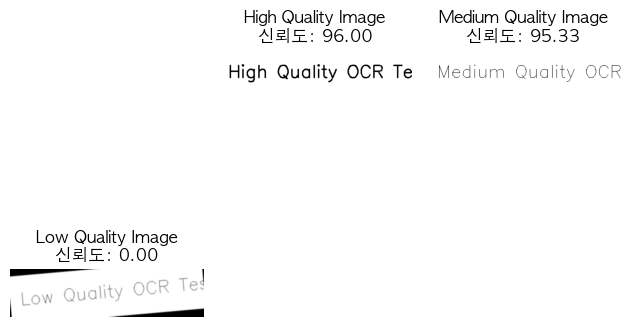

In [77]:
for i, (quality, result) in enumerate(results.items(), start=2):
    plt.subplot(2, 3, i)
    plt.imshow(cv2.cvtColor(result['image'], cv2.COLOR_BGR2RGB))
    plt.title(f"{quality.replace('_', ' ').title()}\n신뢰도: {result['confindence']:.2f}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### 전처리
#### <중요성>

- 노이즈가 많은 이미지 -> 인식률 저하
- 기울어진 텍스트 -> 문자 경계 불명확
- 불균등한 조명 -> 문자와 배경 구분 어려움

#### <주요 전처리 기법>
1. 그레이스케일 변환
2. 이진화
3. 노이즈 제거
4. 기울기 보정

In [10]:
class OCRPreprocessor():
    def __init__(self):
        pass

    def convert_to_grayscale(self, image):
        """
        컬러 이미지를 그레이스케일로 변환
        """
        # 이미지 차원 확인 (3차원 = 컬러, 2차원 = 그레이스케일)
        if len(image.shape) == 3:
            # BGR을 그레이스케일로 변환
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        else:
            gray = image.copy() # 이미 그레이스케일인 경우 복사본 반환

        return gray

    def apply_threshold(self, image, method='adaptive'):
        """
        이미지에 이진화 처리를 적용하여 흑백으로 변환
        """
        gray = self.convert_to_grayscale(image)
        if method == 'simple':
            # 단순 임계값 적용
            _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
            # cv2.threshold(): 이미지 이진화 함수
            # 매개변수
            # gray: 입력 그레이스케일 이미지
            # 127: 임계값 (픽셀 값이 이 값보다 크면 최대값으로 설정)
            # 255: 최대값 (픽셀 값이 임계값보다 크면 이 값으로 설정)
            # cv2.THRESH_BINARY: 이진화 유형 (픽셀 값이 임계값보다 크면 255, 아니면 0)
            # _ : 사용하지 않는 반환값 (임계값)
            # thresh: 이진화된 이미지 반환

        elif method == 'adaptive':
            # 적응형 임계값 적용
            # 11x11 영역의 가우시안 가중 평균에서 2를 밴 값을 임계값으로 사용
            thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                           cv2.THRESH_BINARY, 11, 2)
            # cv2.adaptiveThreshold(): 적응형 이진화 함수
            # 매개변수
            # gray: 입력 그레이스케일 이미지
            # 255: 최대값 (픽셀 값이 임계값보다 크면 이 값으로 설정)
            # cv2.ADAPTIVE_THRESH_GAUSSIAN_C: 적응형 임계값 유형 (가우시안 가중치 사용)
            # cv2.THRESH_BINARY: 이진화 유형 (픽셀 값이 임계값보다 크면 이 값으로 설정)
            # 11: 블록 크기 (임계값 계산에 사용할 픽셀 영역 크기, 홀수여야 함)
            # 2: 상수(C) (임계값 계산에서 빼는 값)
        elif method == 'otsu':
            # Otsu의 이진화 적용
            _, thresh = cv2.threshold(gray, 0, 255, 
                                    cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            # cv2.THRESH_OTSU: Otsu의 이진화 방법 사용 (자동으로 최적의 임계값 계산)

        return thresh

    def remove_noise(self, image):
        """
        이미지에서 노이즈 제거
        """
        # 3x3 커널 생성(모폴로지 연산에 사용)
        # 모폴로지 연산: 이미지의 형태를 변경하는 연산(침식, 팽창 등)
        kernel = np.ones((3, 3), np.uint8)

        # 열림 연산 적용: 작은 노이즈 점들을 제거
        # 먼저 침식으로 작은 흰색 점들을 제거한 후, 팽창으로 원래 크기로 복원
        # 침식: 이미지에서 밝은 영역(흰색)을 축소 (이미지의 픽셀 값이 0인경우 주변 픽셀 값을 0으로 변경)
        # 팽창: 이미지에서 밝은 영역(흰색)을 확장 (0이 아닌 경우 주변 픽셀 값을 255로 변경)
        opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

        # 닫힘 연산 적용: 작은 구멍들을 메움
        # 먼저 팽창으로 작은 구멍들을 메운 후, 침식으로 원래 크기로 복원
        closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

        # 메디안 필터 적용: 소금과 후추 노이즈 제거
        # 3x3 영역의 중앙값으로 노이즈 제거(가우시안 블러보다 에지 보존 효과)
        # denoised = cv2.medianBlur(closing, 3)
        denoised = cv2.GaussianBlur(closing, (3, 3), 0)

        # Gaussian 블러 적용: 가우시안 커널로 노이즈 제거
        # GaussianBlur(이미지, 커널크기, 표준편차(sigmaX))
        # closing: 입력 이미지
        # (3,3): 커널 크기(홀수여야 함)
        # 0: 표준편차(자동 계산)
        return denoised

    def correct_skew(self, image):
        """
        이미지의 기울기를 자동으로 보정
        """
        # Canny 에지 검출 적용: 50~150 사이의 임계값으로 에지 검출
        edges = cv2.Canny(image, 50, 150, apertureSize=3)
        # Canny 매개변수: (이미지, 낮은 임계값, 높은 임계값, 소벨 커널 크기)
        # edges: 에지 검출된 이미지 반환
        # 허프 변환을 사용하여 이미지에서 직선 검출

        lines = cv2.HoughLines(edges, 1, np.pi / 180, 100) # threshold=100 (해도되고 안해도됨.)

        if lines is not None:
            # 검출된 직선들의 기울기 각도 계산
            angles = []
            for rho, theta in lines[:, 0]:
                # 허프 변환에서 theta의 의미:
                # theta = 0도(0 radian) -> 수직선 (|)
                # theta = 90도(pi/2 radian) -> 수평선 (-)
                # theta = 180도(pi radian) -> 다시 수직선

                angle = np.degrees(theta) - 90
                angles.append(angle)

            # 중앙값으로 기울기 보정(이상값에 강건함)
            # 이상 각도가 있을 경우, 평균 값이 왜곡될 수 있기 때문에 중앙값을 사용
            median_angle = np.median(angles)

            (h, w) = image.shape[:2]
            center = (w // 2, h // 2)
            M = cv2.getRotationMatrix2D(center, median_angle, 1.0)

            rotated = cv2.warpAffine(image, M, (w, h),
                                     flags=cv2.INTER_CUBIC,
                                     borderMode=cv2.BORDER_REPLICATE)
                
            return rotated
        return image
    
    def resize_image(self, image, target_height=800):
        """
        OCR 최적화를 위한 이미지 크기 조정
        OCR은 일정 크기 이상에서 성능이 좋아짐
        INTER_CUBIC 보간법으로 고품질 확대
        """
        # 현재 이미지의 높이와 너비 획득
        h, w = image.shape[:2]

        if h < target_height:
            # 이미지가 너무 작은 경우 크기 증가
            # 높이 기준으로 스케일 비율 계산
            scale = target_height / h
            new_w = int(w * scale)

            # INTER_CUBIC 보간법으로 고품질 리사이징
            resized = cv2.resize(image, (new_w, target_height),
                                 interpolation=cv2.INTER_CUBIC)
        else:
            # 이미지가 충분히 큰 경우 원본 유지
            resized = image
        return resized

    def visualize_preprocessing_steps(self, steps, step_names):
        """
        전처리 과정을 단계별로 시각화
        """

        # 2행 3열 서브플롯 생성 (15x10 인치 크기)
        plt.rc('font', family='Malgun Gothic')
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))

        # fig : 전체 그래프 창(캔버스) - 크기, 레이아웃, 저장 등 전체 관리
        # axes : 개별 플롯 영역들의 배열 - 각 칸에 이미지를 그리는 공간(2x3=6개)
        # figsize : 그래프 창 크기 (가로 15인치, 세로 10인치)
        axes = axes.ravel() # 2차원 배열을 1차원으로 변환
        # axes 값 변환 : 2차원 배열을 1차원 배열로 변환하여 각 칸에 이미지를 그리는 공간을 만듦
        # 기존 아래 형태에 있으면 for 문으로 처리하기 어려움
        # axes = [
        #   [axes[0,0], axes[0,1], axes[0,2]], # 첫 번째 행
        #   [axes[1,0], axes[1,1], axes[1,2]]  # 두 번째 행
        # ]
        # axes.ravel() 결과
        # axes = [axes[0], axes[1], axes[2], axes[3], axes[4], axes[5]]

        # 각 처리 단계별로 이미지 출력
        for i, (step, name) in enumerate(zip(steps, step_names)):
            if i < len(axes): # 서브플롯 개수 초과 방지
                if len(step.shape) == 3:
                    # 컬러 이미지: BGR을 RGB로 변환하여 출력
                    axes[i].imshow(cv2.cvtColor(step, cv2.COLOR_BGR2RGB))
                else:
                    # 그레이스케일 이미지: gray 컬러맵 사용
                    axes[i].imshow(step, cmap='gray')

                # 각 서브플롯에 제목 설정 및 축 숨김
                axes[i].set_title(name)
                axes[i].axis('off')

        # 레이아웃 자동 조정 및 출력
        plt.tight_layout()
        plt.show()

    def preprocess_pipeline(self, image, visualize=False):
        """
        전체 이미지 전처리 파이프라인 실행
        """
        # 각 처리 단계별 결과 저장 리스트
        steps = []
        step_names = []

        # 0. 원본 이미지 보존
        steps.append(image.copy())
        step_names.append('원본 이미지')

        # 1. 그레이스케일 변환
        gray = self.convert_to_grayscale(image)
        steps.append(gray)
        step_names.append('그레이스케일')

        # 2. OCR 최적화를 위한 크기 조정
        resized = self.resize_image(gray)
        steps.append(resized)
        step_names.append('크기 조정')

        # 3. 적응적 이진화 처리 (지역적 밝기 변화에 강건)
        thresh = self.apply_threshold(resized, method='adaptive')
        steps.append(thresh)
        step_names.append('이진화')

        # 4. 모폴로지 연산으로 노이즈 제거
        denoised = self.remove_noise(thresh)
        steps.append(denoised)
        step_names.append('노이즈 제거')

        # 5. 허프 변환 기반 기울기 자동 보정
        corrected = self.correct_skew(denoised)
        steps.append(corrected)
        step_names.append('기울기 보정')

        # 시각화 옵션이 활성화된 경우 처리 과정 출력
        if visualize:
            self.visualize_preprocessing_steps(steps, step_names)

        return corrected
    
def create_noisy_sample_image():
    """
    테스트용 노이즈가 있는 샘플 이미지 생성
    """
    # 300x800의 흰색 배경 이미지 생성 (RGB)
    image = np.ones((300, 800, 3), dtype=np.uint8) * 255

    # 다양한 크기와 위치에 텍스트 추가
    font = cv2.FONT_HERSHEY_SIMPLEX
    # 제목 텍스트 (크기 1.5, 굵기 2)
    cv2.putText(image, 'Noisy OCR Test Image', (50, 100), font, 1.5, (0, 0, 0), 2)
    # 부제목 텍스트 (크기 1.0, 굵기 2)
    cv2.putText(image, 'Preprocessing improves accuracy', (50, 150), font, 1, (0, 0, 0), 2)
    # 내용 텍스트 (크기 1.0, 굵기 2)
    cv2.putText(image, 'Machine Learning & AI', (50, 200), font, 1, (0, 0, 0), 2)

    # 0-50 범위의 랜덤 노이즈 생성 및 추가
    noise = np.random.randint(0, 50, image.shape, dtype=np.uint8)
    # random.randint : 0-50 범위의 랜덤 노이즈 생성
    # image.shape : 이미지 크기
    # dtype=np.uint8 : 노이즈 값 범위(0-255)
    # noise : 노이즈 이미지
    # add : 이미지에 노이즈 추가
    # image : 원본 이미지
    noisy_image = cv2.add(image, noise)

    # 문서 스캔 상황을 모방한 5도 기울기 적용
    h, w = noisy_image.shape[:2]
    # 이미지 중심점
    center = (w // 2, h // 2)
    # 5도 회전, 중심점, 스케일 1.0
    M = cv2.getRotationMatrix2D(center, 5, 1.0)
    skewed_image = cv2.warpAffine(noisy_image, M, (w, h))
    # warpAffine 매개변수: 이미지, 회전 행렬, 출력 이미지 크기
    # noisy_image : 원본 이미지
    # M : 회전 행렬 (getRotationMatrix2D로 생성)
    # (w, h) : 출력 이미지 크기
    # skewed_image : 회전된 이미지

    return skewed_image

def preprocessing_example():
    """
    OCR 예제 실행 함수
    """
    # OCR 전처리 인스턴스 생성
    preprocessor = OCRPreprocessor()

    # 노이즈와 기울기가 있는 샘플 이미지 생성
    image = create_noisy_sample_image()
    
    # 전체 전처리 파이프라인 실행 (시각화 포함)
    processed_image = preprocessor.preprocess_pipeline(image, visualize=True)

    # OCR 라이브러리가 있는 경우 전후 비교
    try:
        import pytesseract
        
        # 전처리 전 OCR 결과
        original_text = pytesseract.image_to_string(image)
        # 전처리 후 OCR 결과
        processed_text = pytesseract.image_to_string(processed_image)

        print("전처리 전 OCR 결과:")
        print(repr(original_text))
        print("\n전처리 후 OCR 결과:")
        print(repr(processed_text))

    except ImportError:
        print("pytesseract가 설치되지 않아 OCR 비교를 건너뜁니다.")
        print("설치: pip install pytesseract")
    
    return processed_image


### Tesseract 엔진
#### <작동원리>

- 페이지 분석
- 문자 분할
- 패턴 매칭
- 언어 모델

### CRNN 모델
#### <>